In [22]:
# based on https://towardsdatascience.com/pytorch-tutorial-distilled-95ce8781a89c
# also based on http://pytorch.org/tutorials/beginner/pytorch_with_examples.html#warm-up-numpy
import matplotlib.pyplot as plt
from __future__ import print_function
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np

torch.manual_seed(12)



In [23]:
# generate dataset
N = 8 # data points
lr = 1e-6
epochs = 10000
x = Variable(torch.Tensor(1,N).uniform_(1,20), requires_grad=False)
a, b, c  = 0, 2, 3
y = a*x**2 + b*x + c
# print(in_data,"\n",out_data)

In [24]:
w1 = Variable(torch.randn(1,1), requires_grad=True)
w2 = Variable(torch.randn(1,1), requires_grad=True)
b1 = Variable(torch.randn(1,1), requires_grad=True)
b2 = Variable(torch.randn(1,1), requires_grad=True)


for step in range(epochs):
    # forward pass
    x1 = x
    y1 = w1*x1 + b1
    
    x2 = (y1)
    #    x2 = F.sigmoid(y1)
    y2 = w2*x2 + b2
    
    # define loss function and backprop
    loss = (y2 - y).pow(2).sum()
    loss.backward()
    
    w1.data -= lr * w1.grad.data
    b1.data -= lr * b1.grad.data
    w2.data -= lr * w2.grad.data
    b2.data -= lr * b2.grad.data
    
    # zero gradients
    w1.grad.data.zero_()
    b1.grad.data.zero_()
    w2.grad.data.zero_()
    b2.grad.data.zero_()



 chi2ndf = 0.623468


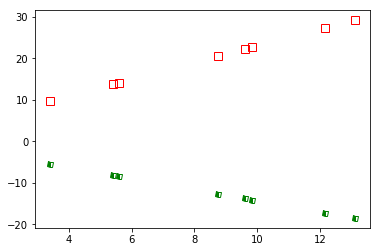

In [25]:
# test what was learned with PyTorch
x1 = x
y1 = w1*x1 + b1
    
x2 = y1
#x2 = F.sigmoid(y1)
y2 = w2*x2 + b2

loss = (y2 - y).pow(2).sum()
chi2ndf = loss/N


print (" chi2ndf = %f"%chi2ndf)

plt.subplots()
plt.plot(x1.data.numpy(), y1.data.numpy(), 'gs', label='PyTorch', fillstyle='left', markersize=5) 
plt.plot(x.data.numpy(), y.data.numpy(), 'rs', label='True',fillstyle='none', markersize=8)
plt.show()
